In [3]:
# Description: This program uses an artificial recurrent neutral network called Long
#              Short Term Memory (LSTM) to predict the closing stock price of a 
#              corporation (Apple Inc.) using the past 60 day stock price

In [6]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [12]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2020-01-01')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.572422
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.583784
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.479061
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.467082
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.510078
...,...,...,...,...,...,...
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.234581
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.628067
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.600876


In [10]:
#Get the number of Rows & Columns in the data set
df.shape 

(2264, 6)

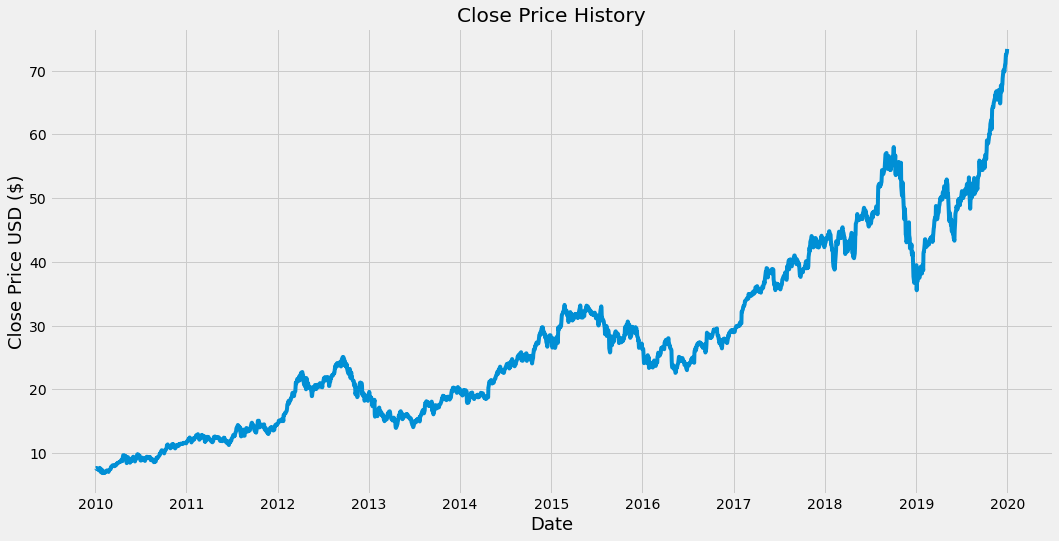

In [13]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [14]:
#Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

2013

In [16]:
#Scale the data
scaler =  MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01178427],
       [0.01198282],
       [0.01015293],
       ...,
       [0.98553794],
       [0.99199891],
       [1.        ]])

In [19]:
#Create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([1.17842676e-02, 1.19828232e-02, 1.01529343e-02, 9.94363872e-03,
       1.06949161e-02, 9.69144086e-03, 8.40889292e-03, 9.98120331e-03,
       9.32652775e-03, 7.44834148e-03, 1.23369893e-02, 1.05607712e-02,
       8.59670868e-03, 3.05875169e-03, 5.91359568e-03, 7.45370785e-03,
       8.49476200e-03, 3.88515107e-03, 5.35920459e-06, 1.43814399e-03,
       2.04452939e-03, 3.85295285e-03, 0.00000000e+00, 1.82987462e-03,
       1.11080262e-03, 2.22161957e-03, 1.64742522e-03, 3.55244334e-03,
       4.47007816e-03, 6.09068587e-03, 5.63455881e-03, 5.83846651e-03,
       5.16231831e-03, 4.49153647e-03, 2.68847937e-03, 4.62033650e-03,
       5.33940849e-03, 6.74536143e-03, 9.09042183e-03, 9.01529266e-03,
       9.27285689e-03, 1.00134015e-02, 1.44351967e-02, 1.45049595e-02,
       1.66192588e-02, 1.75959094e-02, 1.79500754e-02, 1.85403761e-02,
       1.70592940e-02, 1.73866282e-02, 1.72095451e-02, 1.74939555e-02,
       1.62060556e-02, 1.75476192e-02, 1.94848284e-02, 2.00268245e-02,
     

In [21]:
#Convert the x_train and y_train to numpy Arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1953, 60, 1)

In [26]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [28]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1953/1953 [==============================] - 62s 22ms/step - loss: 7.1527e-04


In [30]:
#Create the testing data set
#Create a new array containing scaled values from index 1600 to 2004
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [32]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [33]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [34]:
#Get the model predicted  price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [37]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

3.001190610244781

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


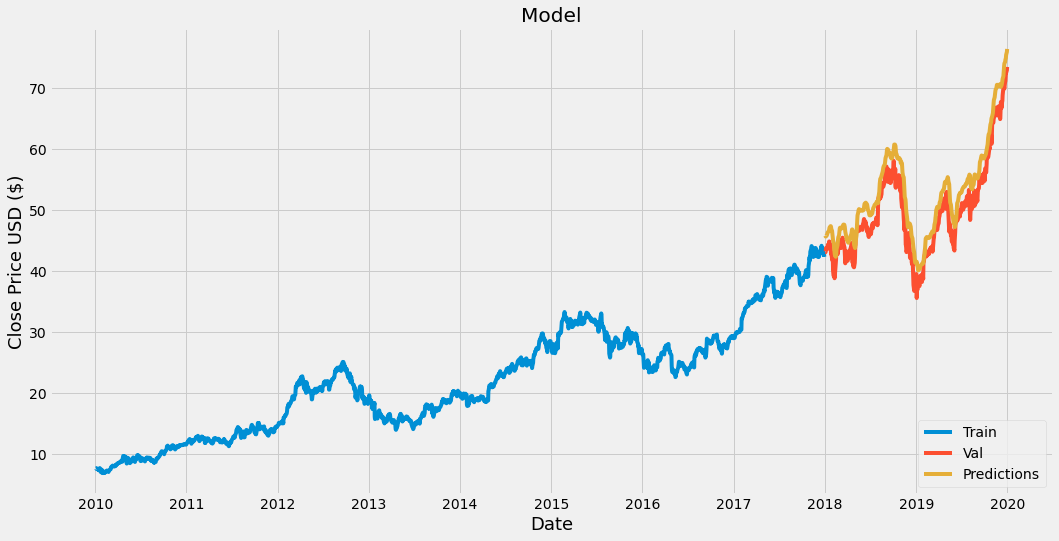

In [41]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [42]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-01-02,43.064999,45.750786
2018-01-03,43.057499,45.650360
2018-01-04,43.257500,45.621567
2018-01-05,43.750000,45.663857
2018-01-08,43.587502,45.812336
...,...,...
2019-12-24,71.067497,74.563507
2019-12-26,72.477501,74.885902
2019-12-27,72.449997,75.385925


In [46]:
#Get the quote 
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2020-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list 
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(x_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[45.750786]
 [45.65036 ]
 [45.621567]
 [45.663857]
 [45.812336]
 [45.964302]
 [46.098614]
 [46.205112]
 [46.32281 ]
 [46.49922 ]
 [46.64069 ]
 [46.861725]
 [47.09138 ]
 [47.260803]
 [47.32038 ]
 [47.321404]
 [47.18082 ]
 [46.87179 ]
 [46.543716]
 [46.110085]
 [45.652027]
 [45.265434]
 [44.980938]
 [44.501457]
 [43.8517  ]
 [43.47304 ]
 [43.133835]
 [42.69818 ]
 [42.33511 ]
 [42.30358 ]
 [42.4947  ]
 [42.887306]
 [43.54276 ]
 [44.207615]
 [44.764805]
 [45.16255 ]
 [45.483047]
 [45.833607]
 [46.27762 ]
 [46.67225 ]
 [46.974613]
 [47.0634  ]
 [47.085636]
 [47.090313]
 [47.07524 ]
 [46.985554]
 [46.948795]
 [47.05858 ]
 [47.28765 ]
 [47.471348]
 [47.55136 ]
 [47.58193 ]
 [47.559258]
 [47.40754 ]
 [47.21682 ]
 [46.87697 ]
 [46.4238  ]
 [45.8293  ]
 [45.563408]
 [45.307747]
 [45.029663]
 [44.836502]
 [44.669025]
 [44.608997]
 [44.735786]
 [44.979958]
 [45.074184]
 [45.157364]
 [45.347134]
 [45.524826]
 [45.73979 ]
 [45.962532]
 [46.198933]
 [46.501358]
 [46.77223 ]
 [46.79003 ]
 [46.410286]

In [48]:
#Get the quote 
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-12-17', end='2020-12-17')
print(apple_quote2['Close'])

Date
2020-12-17    128.699997
Name: Close, dtype: float64
